# Задача 1

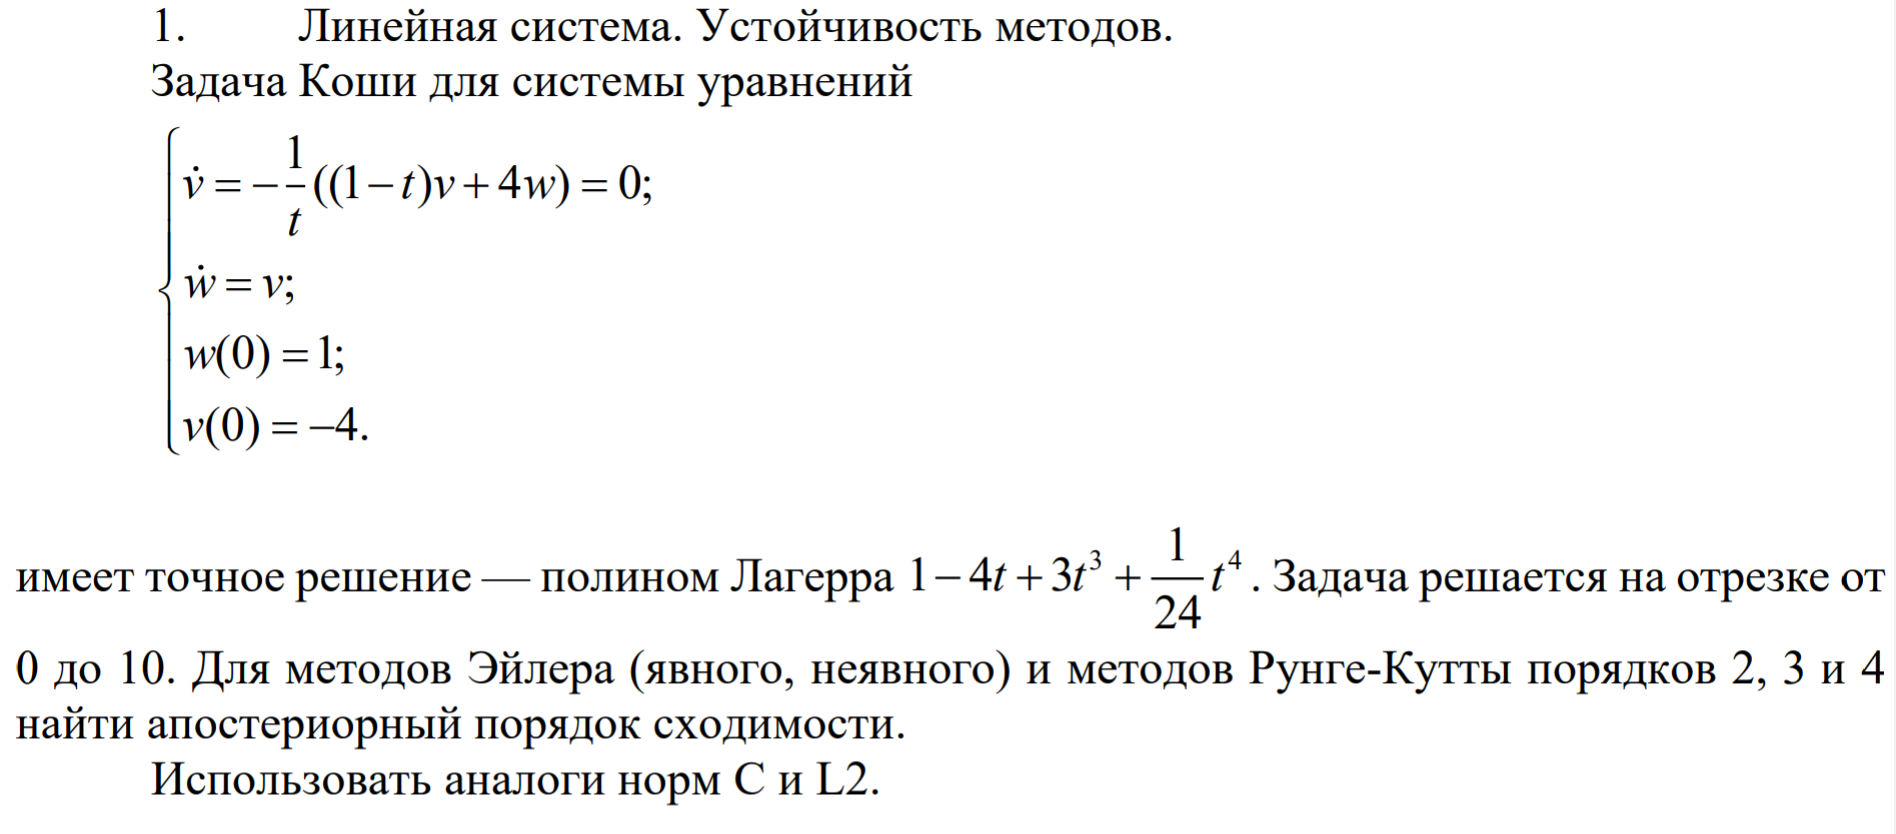

Систему и начальное условие можно переписать в виде:

$$\begin{array}{l}
\left(\begin{array}{l}
\dot v \\
\dot w
\end{array}\right)=\left(\begin{array}{cc}
1-\frac{1}{t} & -\frac{4}{t} \\
1 & 0
\end{array}\right)\left(\begin{array}{l}
v \\
w
\end{array}\right) \\
\left(\begin{array}{l}
v \\
w
\end{array}\right)(0)=\left(\begin{array}{c}
-4 \\
1
\end{array}\right)
\end{array}$$

Или 

$$\begin{array}{l}
\dot{u}=A(t) \cdot u \equiv f(t, u)\\
A(t)=\left(\begin{array}{cc}
1-\frac{1}{t} & -\frac{4}{t} \\
1 & 0
\end{array}\right) \\
u(t)=\left(\begin{array}{c}
v(t) \\
w(t)
\end{array}\right) \\
u(0)=\left(\begin{array}{c}
-4 \\
1
\end{array}\right)
\end{array}$$

Точное решение выражается в виде полинома Лагерра: 
$$w^*(t) = 1 - 4t + 3t^2 - \frac{2t^3}{3} + \frac{t^4}{24}$$

Требуется решить задачу на отрезке $t \in [0, 10]$, используя методы:
* Явный метод Эйлера
* Неявный метод Эйлера
* Методы Рунге-Кутты 2, 3 и 4 порядков.

Также нужно найти апостериорный порядок сходимости для каждого из этих методов.

Использовать аналоги норм:
* $C$-норма:
$$||x||_C \sim ||x||_{\infty} \equiv ||x||_1 = \max_{i}|x_i|$$
* и $L_2$-норма:
$$||x||_{L_2} \sim ||x||_2 \equiv ||x||_3 = \sqrt{\sum_{i}{x_i^2}}$$

## Методы

In [97]:
import numpy as np
from numpy.linalg import norm, inv

In [98]:
def A_1(t):
    return np.array([[1 - 1 / t, -4 / t], [1, 0]])

In [99]:
def exact_solution(t):
    return 1 - 4 * t + 3 * t**2 - 2/3 * t**3 + t**4 / 24

In [100]:
u_0 = np.array([-4, 1])

### Явный метод Эйлера
Метод имеет вид:

$$\frac{u^{n+1}-u^{n}}{\tau}=f\left(t_n, u^{n}\right) \equiv f^n,$$

где $\tau$ - величина шага на одной итерации, $n$ - номер итерации, $t_n \equiv t_0 + n\tau$ (рассматриваем равномерную сетку).

В случае нашей задачи

$$\frac{u^{n+1}-u^{n}}{\tau}=A\left(t_{n}\right) u^{n}$$

То есть итерационный процесс задается уравнением:

$$
\begin{array}{l}
u^{n+1}=\left[E+\tau A\left(t_{n}\right)\right] u^{n}\\
u^0 = u(0)=\left(\begin{array}{c}
-4 \\
1
\end{array}\right),
\end{array} 
$$

где $E$ - единичная матрица размера 2х2.

In [101]:
def explicit_euler(A, t_0, t_max, tau, u_0, epsilon=1e-5):
    """
    Явный метод Эйлера для многомерных дифференциальных уравнений.
    
    Параметры:
    A - матрица A(t), на которую умножается вектор u(t)
    t_0 - левая граница отрезка, на котором решается задача Коши
    t_max - правая граница отрезка, на котором решается задача Коши
    tau - величина шага на итерации
    u_0 - вектор начальных условий (dot(x)(p), x(p)) (в этом случае реализовано как значение u(t_0))
    epsilon - малое значение для избежания ошибки деления на ноль при расчете матрицы А(0)
    
    Возвращает значения t, dot(x)(t) и x(t) в узлах сетки.
    """
    dim = len(u_0)
    N = int((t_max - t_0) / tau)  # число шагов
    # в задаче t_0 == 0, а A(0) не определена
    t = [t_0 + epsilon] + [t_0 + n * tau for n in range(1, N + 1)]  # сетка
    u = np.array([[0.] * dim for _ in range(N + 1)])  # вектор u(t) в узлах сетки
    u[0] = u_0  # начальное приближение
    for n in range(N):
        u[n + 1] = (np.eye(dim) + tau * A(t[n])) @ u[n]
    return t, u[:, 0], u[:, 1]

### Неявный метод Эйлера
Метод имеет вид:
$$
\frac{u^{n+1}-u^{n}}{\tau}=f\left(t_{n+1}, u^{n+1}\right) \equiv f^{n+1},
$$

где $\tau$ - величина шага на одной итерации, $n$ - номер итерации, $t_n \equiv t_0 + n\tau$ (рассматриваем равномерную сетку).

В случае нашей задачи
$$\frac{u^{n+1}-u^{n}}{\tau}=A\left(t_{n+1}\right) u^{n+1}$$

То есть итерационный процесс задается уравнением:

$$
\begin{array}{l}
u^{n+1}=\left[E-\tau A\left(t_{n+1}\right)\right]^{-1} u^{n}\\
u^0 = u(0)=\left(\begin{array}{c}
-4 \\
1
\end{array}\right),
\end{array} 
$$

где $E$ - единичная матрица размера 2х2, а степень $-1$ у выражения в квадратных скобках означает обратную матрицу.

In [102]:
def implicit_euler(A, t_0, t_max, tau, u_0):
    """
    Неявный метод Эйлера для многомерных дифференциальных уравнений.
    
    Параметры:
    A - матрица A(t), на которую умножается вектор u(t)
    t_0 - левая граница отрезка, на котором решается задача Коши
    t_max - правая граница отрезка, на котором решается задача Коши
    tau - величина шага на итерации
    u_0 - вектор начальных условий (dot(x)(p), x(p)) (в этом случае реализовано как значение u(t_0))
    
    Возвращает значения t, dot(x)(t), x(t) на сетке.
    """
    dim = len(u_0)
    N = int((t_max - t_0) / tau)  # число шагов
    t = [t_0 + n * tau for n in range(N + 1)]  # сетка
    u = np.array([[0.] * dim for _ in range(N + 1)])  # вектор u(t) в узлах сетки
    u[0] = u_0  # начальное приближение
    for n in range(N):
        u[n + 1] = inv(np.eye(dim) - tau * A(t[n + 1])) @ u[n]  # inv - обратная матрица
    return t, u[:, 0], u[:, 1]

### Методы Рунге-Кутты
$s$-стадийным **явным** методом Рунге-Кутты (ЯМРК) с определяющими коэффициентами

$$
\begin{array}{l}
a_{ij}, \space 1 \leq i \leq s, \space 1 \leq j \leq s-1, \space a_{11} \equiv 0 \\
c_i, \space 1 \leq i \leq s, \space c_1 \equiv 0 \\
b_i, \space 1 \leq i \leq s
\end{array}
$$

Называется метод вида

$$
\begin{array}{l}
k_1 = f(t_n, u^n) \\
k_i = f(t_n + c_i\tau, u^n + \tau\displaystyle\sum_{j=1}^{i-1}{a_{ij}k_j}), \space i > 1 \\ 
u^{n+1} = u^n + \tau\displaystyle\sum_{i=1}^s{b_i k_i}
\end{array} 
$$

В нашем случае выражение можно переписать в виде

$$
\begin{array}{l}
k_1 = A(t_n)\cdot u^n \\
k_i = A(t_n + c_i\tau)\cdot (u^n + \tau\displaystyle\sum_{j=1}^{i-1}{a_{ij}k_j}), \space i > 1 \\ 
u^{n+1} = u^n + \tau\displaystyle\sum_{i=1}^s{b_i k_i}
\end{array} 
$$

Удобное представление коэффициентов метода - таблица Бутчера (пустые места $\Leftrightarrow$ нули):

$$
\begin{array}{c|ccccc}
0 & & & & & \\
c_{2} & a_{21} & & & & \\
c_{3} & a_{31} & a_{32} & & & \\
\vdots & \vdots & \vdots & \ddots & & \\
c_{s} & a_{s 1} & a_{s 2} & \ldots & a_{s s-1} & \\
\hline & b_{1} & b_{2} & \ldots & b_{s-1} & b_{s}
\end{array}
$$

Таблицы Бутчера для ЯМРК разных порядков:
* Метод Эйлера с пересчетом (второй порядок точности)

$$
\begin{array}{l|ll}
0 & 0 & \\
1 & 1 & 0 \\
\hline & 1 / 2 & 1 / 2 \\
\end{array}
$$

* Метод Хойна (третий порядок точности)

$$
\begin{array}{l|lll}
0 & 0 & & \\
1 / 3 & 1 / 3 & 0 & \\
2 / 3 & 0 & 2 / 3 & 0 \\
\hline & 1 / 4 & 0 & 3 / 4 \\
\end{array}
$$

* Классический 4-стадийный метод (четвертый порядок точности)

$$
\begin{array}{l|llll}
0 & 0 & & & \\
1 / 2 & 1 / 2 & 0 & & \\
1 / 2 & 0 & 1 / 2 & 0 & \\
1 & 0 & 0 & 1 & 0 \\
\hline & 1 / 6 & 2 / 6 & 2 / 6 & 1 / 6 \\
\end{array}
$$

In [103]:
a2 = np.array([
    [0, 0],
    [1, 0]
])

a3 = np.array([
    [0, 0, 0],
    [1/3, 0, 0],
    [0, 2/3, 0]
])

a4 = np.array([
    [0, 0, 0, 0],
    [1/2, 0, 0, 0],
    [0, 1/2, 0, 0],
    [0, 0, 1, 0]
])

In [104]:
b2, b3, b4 = np.array([1/2] * 2), np.array([1/4, 0, 3/4]), np.array([1/6, 2/6, 2/6, 1/6])

In [105]:
c2, c3, c4 = np.array([0, 1]), np.array([0, 1/3, 2/3]), np.array([0, 1/2, 1/2, 1])

In [106]:
_2_order = [a2, b2, c2]
_3_order = [a3, b3, c3]
_4_order = [a4, b4, c4]

In [107]:
def runge_kutta(a, b, c, A, t_0, t_max, tau, u_0, epsilon=1e-4):
    """
    Явные методы Рунге-Кутты для многомерных дифференциальных уравнений.
    
    Параметры:
    a - матрица размера sxs
    b, c - векторы размера sx1
    A - матрица A(t), на которую умножается вектор u(t)
    t_0 - левая граница отрезка, на котором решается задача Коши
    t_max - правая граница отрезка, на котором решается задача Коши
    tau - величина шага на итерации
    u_0 - вектор начальных условий (dot(x)(p), x(p)) (в этом случае реализовано как значение u(t_0))
    epsilon - малое значение для избежания ошибки деления на ноль при расчете матрицы А(0)
    
    Возвращает значения t, dot(x)(t), x(t) на сетке.
    """
    dim = len(u_0)  # размерность системы
    N = int((t_max - t_0) / tau)  # число шагов
    # в задаче t_0 == 0, а A(0) не определена
    t = [t_0 + epsilon] + [t_0 + n * tau for n in range(1, N + 1)]  # сетка
    u = np.array([[0.] * dim for _ in range(N + 1)])  # вектор u(t) в узлах сетки
    u[0] = u_0  # начальное приближение
    s = len(b)  # число стадий
    for n in range(N):
        k = np.array([[0.] * dim for _ in range(s)])
        for i in range(s):
            k[i] = A(t[n] + c[i] * tau) @ (u[n] + tau * a[i] @ k)
        u[n + 1] = u[n] + tau * b @ k
    return t, u[:, 0], u[:, 1]

## Вычисление решения при помощи описанных методов

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
step = [2**(-i) for i in range(1, 12, 2)]

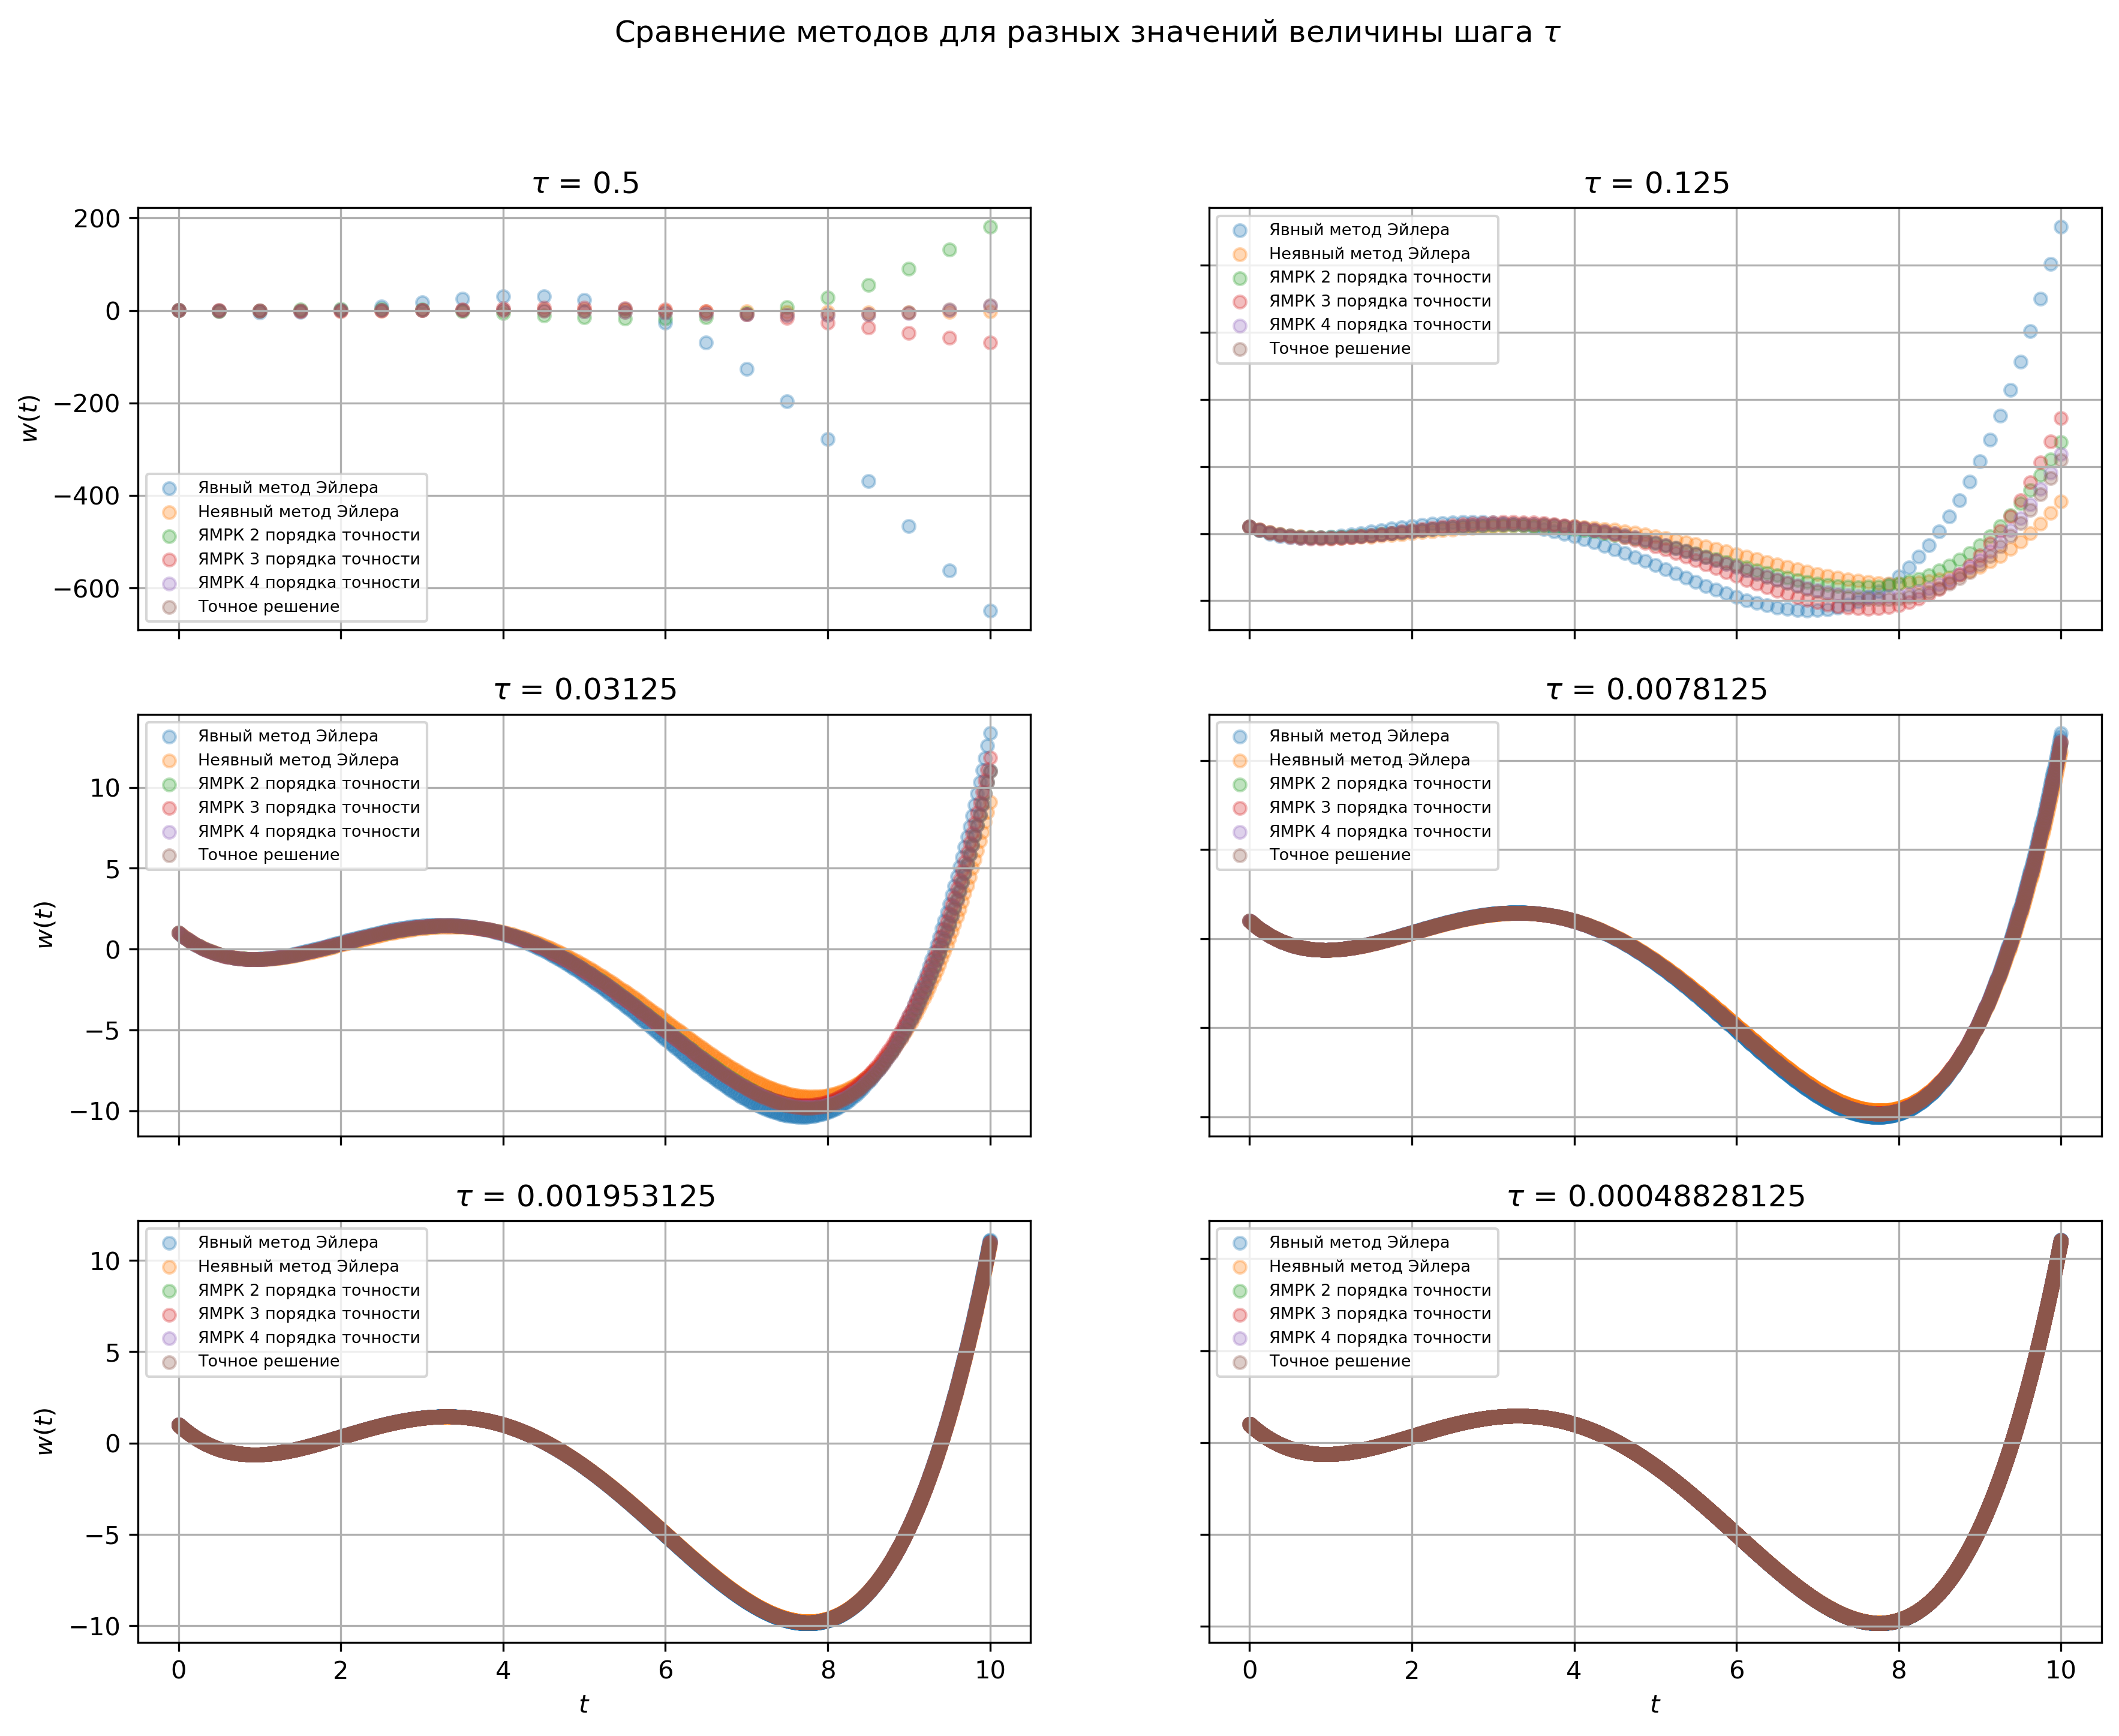

In [168]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(6.4 * 2.2, 4.8 * 2.2)
fig.set_dpi(300)
fig.suptitle(r'Сравнение методов для разных значений величины шага $\tau$')
for i, tau in enumerate(step):
    t, v, w = explicit_euler(A_1, 0, 10, tau, u_0)
    axes[i // 2, i % 2].scatter(t, w, s=25, alpha=0.3, label='Явный метод Эйлера')
    t, v, w = implicit_euler(A_1, 0, 10, tau, u_0)
    axes[i // 2, i % 2].scatter(t, w, s=25, alpha=0.3, label='Неявный метод Эйлера')
    for j, order in enumerate([_2_order, _3_order, _4_order]):
        t, v, w = runge_kutta(*order, A_1, 0, 10, tau, u_0)
        axes[i // 2, i % 2].scatter(t, w, s=25, alpha=0.3, label='ЯМРК {} порядка точности'.format(j + 2))
    axes[i // 2, i % 2].scatter(t, exact_solution(np.array(t)), s=25, alpha=0.3, label='Точное решение')
    axes[i // 2, i % 2].set_title(r'$\tau$ = {}'.format(tau))
    axes[i // 2, i % 2].grid()
    if i == 0:
        axes[i // 2, i % 2].legend(loc='lower left', prop={'size': 6.5})
    else:
        axes[i // 2, i % 2].legend(loc='upper left', prop={'size': 6.5})
        
for ax in axes.flat:
    ax.set(xlabel=r'$t$', ylabel=r'$w(t)$')
for ax in axes.flat:
    ax.label_outer()

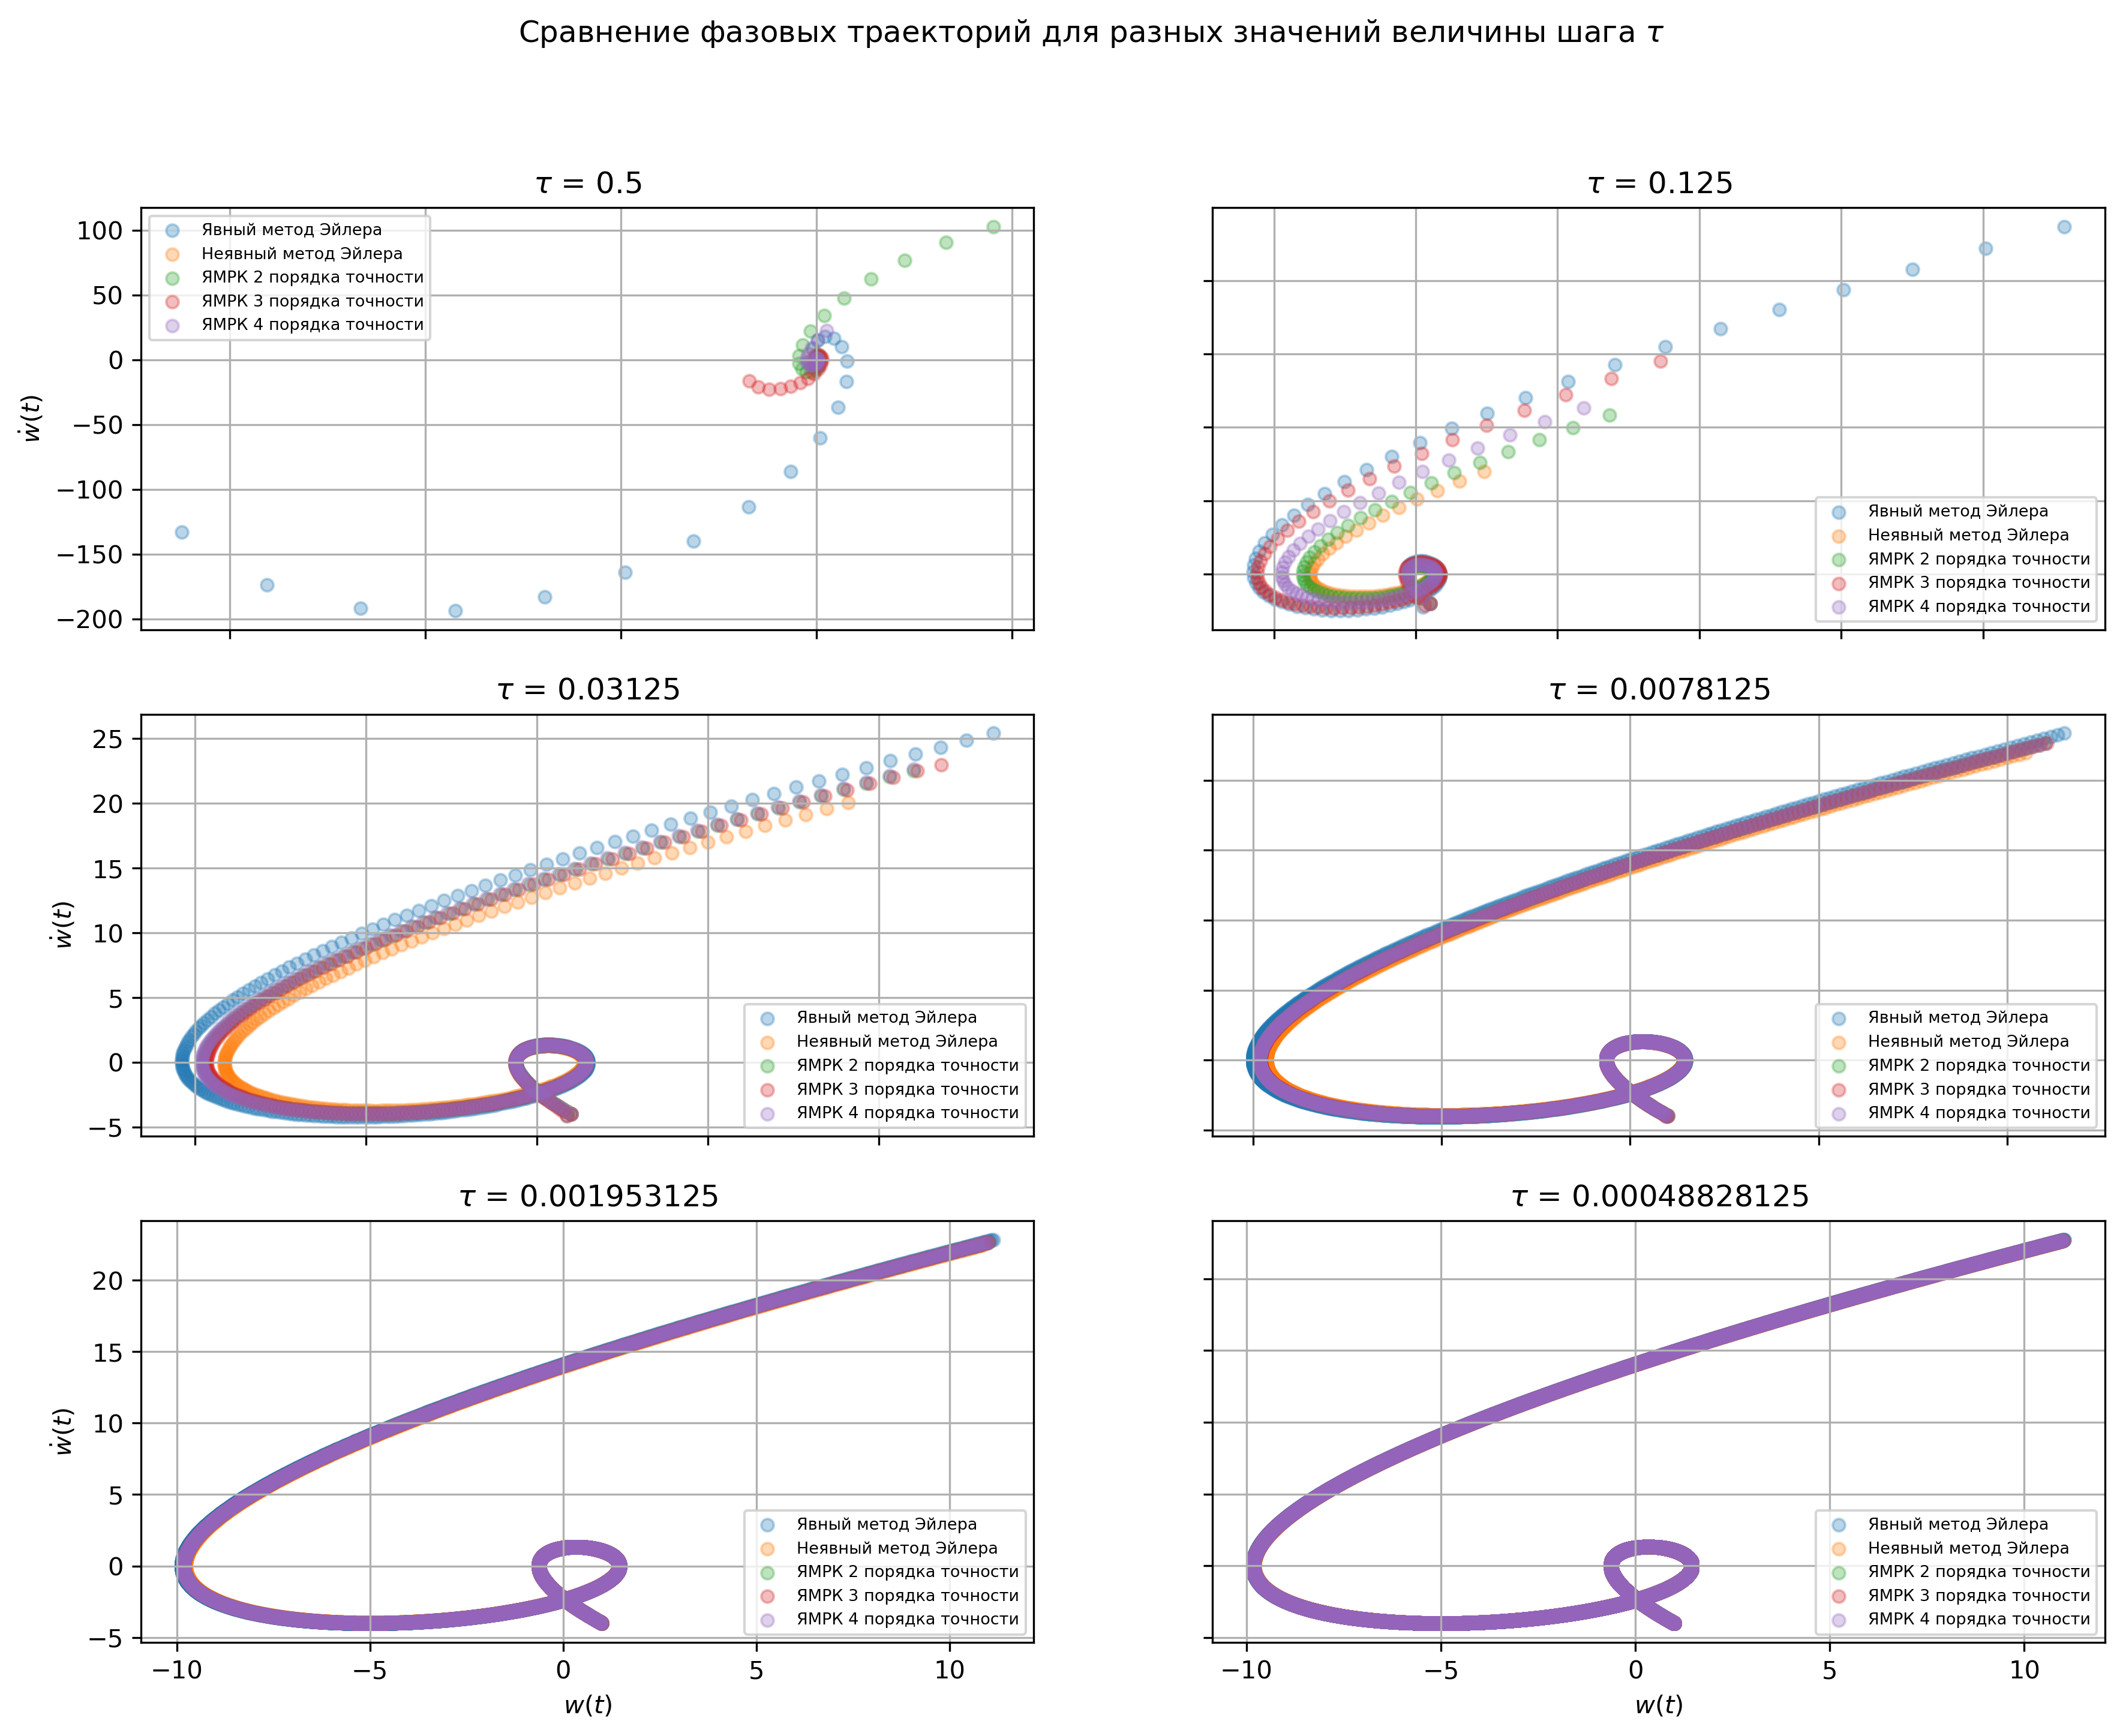

In [169]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(6.4 * 2.2, 4.8 * 2.2)
fig.set_dpi(300)
fig.suptitle(r'Сравнение фазовых траекторий для разных значений величины шага $\tau$')
for i, tau in enumerate(step):
    t, v, w = explicit_euler(A_1, 0, 10, tau, u_0)
    axes[i // 2, i % 2].scatter(w, v, s=25, alpha=0.3, label='Явный метод Эйлера')
    t, v, w = implicit_euler(A_1, 0, 10, tau, u_0)
    axes[i // 2, i % 2].scatter(w, v, s=25, alpha=0.3, label='Неявный метод Эйлера')
    for j, order in enumerate([_2_order, _3_order, _4_order]):
        t, v, w = runge_kutta(*order, A_1, 0, 10, tau, u_0)
        axes[i // 2, i % 2].scatter(w, v, s=25, alpha=0.3, label='ЯМРК {} порядка точности'.format(j + 2))
    axes[i // 2, i % 2].set_title(r'$\tau$ = {}'.format(tau))
    axes[i // 2, i % 2].grid()
    if i == 0:
        axes[i // 2, i % 2].legend(loc='upper left', prop={'size': 6.5})
    else:
        axes[i // 2, i % 2].legend(loc='lower right', prop={'size': 6.5})

for ax in axes.flat:
    ax.set(xlabel=r'$w(t)$', ylabel=r'$\dot w(t)$')
for ax in axes.flat:
    ax.label_outer()

Видно, что при большом $\tau$ все методы расходятся. При уменьшении величины шага лучше показывают себя методы Рунге-Кутты, методы Эйлера сходятся к точному решению хуже.

## Вычисление апостериорных порядков сходимости
Апостериорный порядок сходимости определяется из соотношения

$$||w_{\tau} - [w]_{\tau}|| \leq C\tau^{p+1},$$

где $w_{\tau}$ - значения приближенного решения, $[w]_{\tau}$ - проекция точного решения на сетку, $p$ - порядок сходимости. Показатель степени больше на 1 ($p + 1$), т.к. мы умножали уравнение на $\tau$ при поиске решения.

Отсюда 

$$\ln{||w_{\tau} - [w]_{\tau}||} \leq ln{C} + (p+1)\ln{\tau}$$

Построим прямые (случай равенства) и по значению коэффициентов наклона определим порядки сходимости.

In [111]:
from math import inf
from scipy.optimize import curve_fit

In [112]:
def linear_func(x, k, b):
    return k * x + b

In [113]:
C_norm = pd.DataFrame(
    columns=['Явный метод Эйлера', 'Неявный метод Эйлера'] + ['ЯМРК {} порядка точности'.format(j + 2) for j in range(3)],
    index = [2**(-i) for i in range(1, 12, 2)]
)

L2_norm = pd.DataFrame(
    columns=['Явный метод Эйлера', 'Неявный метод Эйлера'] + ['ЯМРК {} порядка точности'.format(j + 2) for j in range(3)],
    index = [2**(-i) for i in range(1, 12, 2)]
)

In [114]:
C_norm.index.name = 'Величина шага'
L2_norm.index.name = 'Величина шага'

In [115]:
for tau in [2**(-i) for i in range(1, 12, 2)]:
    t, v, w = explicit_euler(A_1, 0, 10, tau, u_0)
    C_norm['Явный метод Эйлера'][tau] = np.log(norm(w - exact_solution(np.array(t)), inf))
    L2_norm['Явный метод Эйлера'][tau] = np.log(norm(w - exact_solution(np.array(t)), 2))
    t, v, w = implicit_euler(A_1, 0, 10, tau, u_0)
    C_norm['Неявный метод Эйлера'][tau] = np.log(norm(w - exact_solution(np.array(t)), inf))
    L2_norm['Неявный метод Эйлера'][tau] = np.log(norm(w - exact_solution(np.array(t)), 2))
    for j, order in enumerate([_2_order, _3_order, _4_order]):
        t, v, w = runge_kutta(*order, A_1, 0, 10, tau, u_0)
        C_norm['ЯМРК {} порядка точности'.format(j + 2)][tau] = np.log(norm(w - exact_solution(np.array(t)), inf))
        L2_norm['ЯМРК {} порядка точности'.format(j + 2)][tau] = np.log(norm(w - exact_solution(np.array(t)), 2))

In [116]:
C_norm

Явный метод Эйлера Неявный метод Эйлера ЯМРК 2 порядка точности  \
Величина шага                                                                   
0.500000                 6.49202              2.52573                  5.1342   
0.125000                 3.54783              1.82066                  1.0966   
0.031250                0.850022             0.645868                -2.24149   
0.007812               -0.654957            -0.684042                -5.22777   
0.001953                 -2.0495               -2.056                 -7.8211   
0.000488                 -3.4371             -3.43869                -7.82412   

              ЯМРК 3 порядка точности ЯМРК 4 порядка точности  
Величина шага                                                  
0.500000                      4.38148               -0.577071  
0.125000                      1.83342               -0.198754  
0.031250                    -0.193574                -3.57669  
0.007812                     -3.01842                -6.41399  
0.001953                     -5.99612                -7.82412  
0.000488                     -7.82412                -7.82412

In [117]:
L2_norm

Явный метод Эйлера Неявный метод Эйлера ЯМРК 2 порядка точности  \
Величина шага                                                                   
0.500000                 7.00909              2.99462                 5.51317   
0.125000                 4.40484              2.74668                 2.52613   
0.031250                 2.32195              2.20102              -0.0745467   
0.007812                 1.56313                1.548                -2.37428   
0.001953                0.868816             0.865116                -4.27365   
0.000488                0.175487             0.174548                -5.62599   

              ЯМРК 3 порядка точности ЯМРК 4 порядка точности  
Величина шага                                                  
0.500000                       4.7516               0.0270658  
0.125000                      2.61908                 1.08285  
0.031250                      1.48893                -1.40827  
0.007812                    -0.402673                -3.55903  
0.001953                     -2.51024                -4.92185  
0.000488                     -4.83804                -5.82471

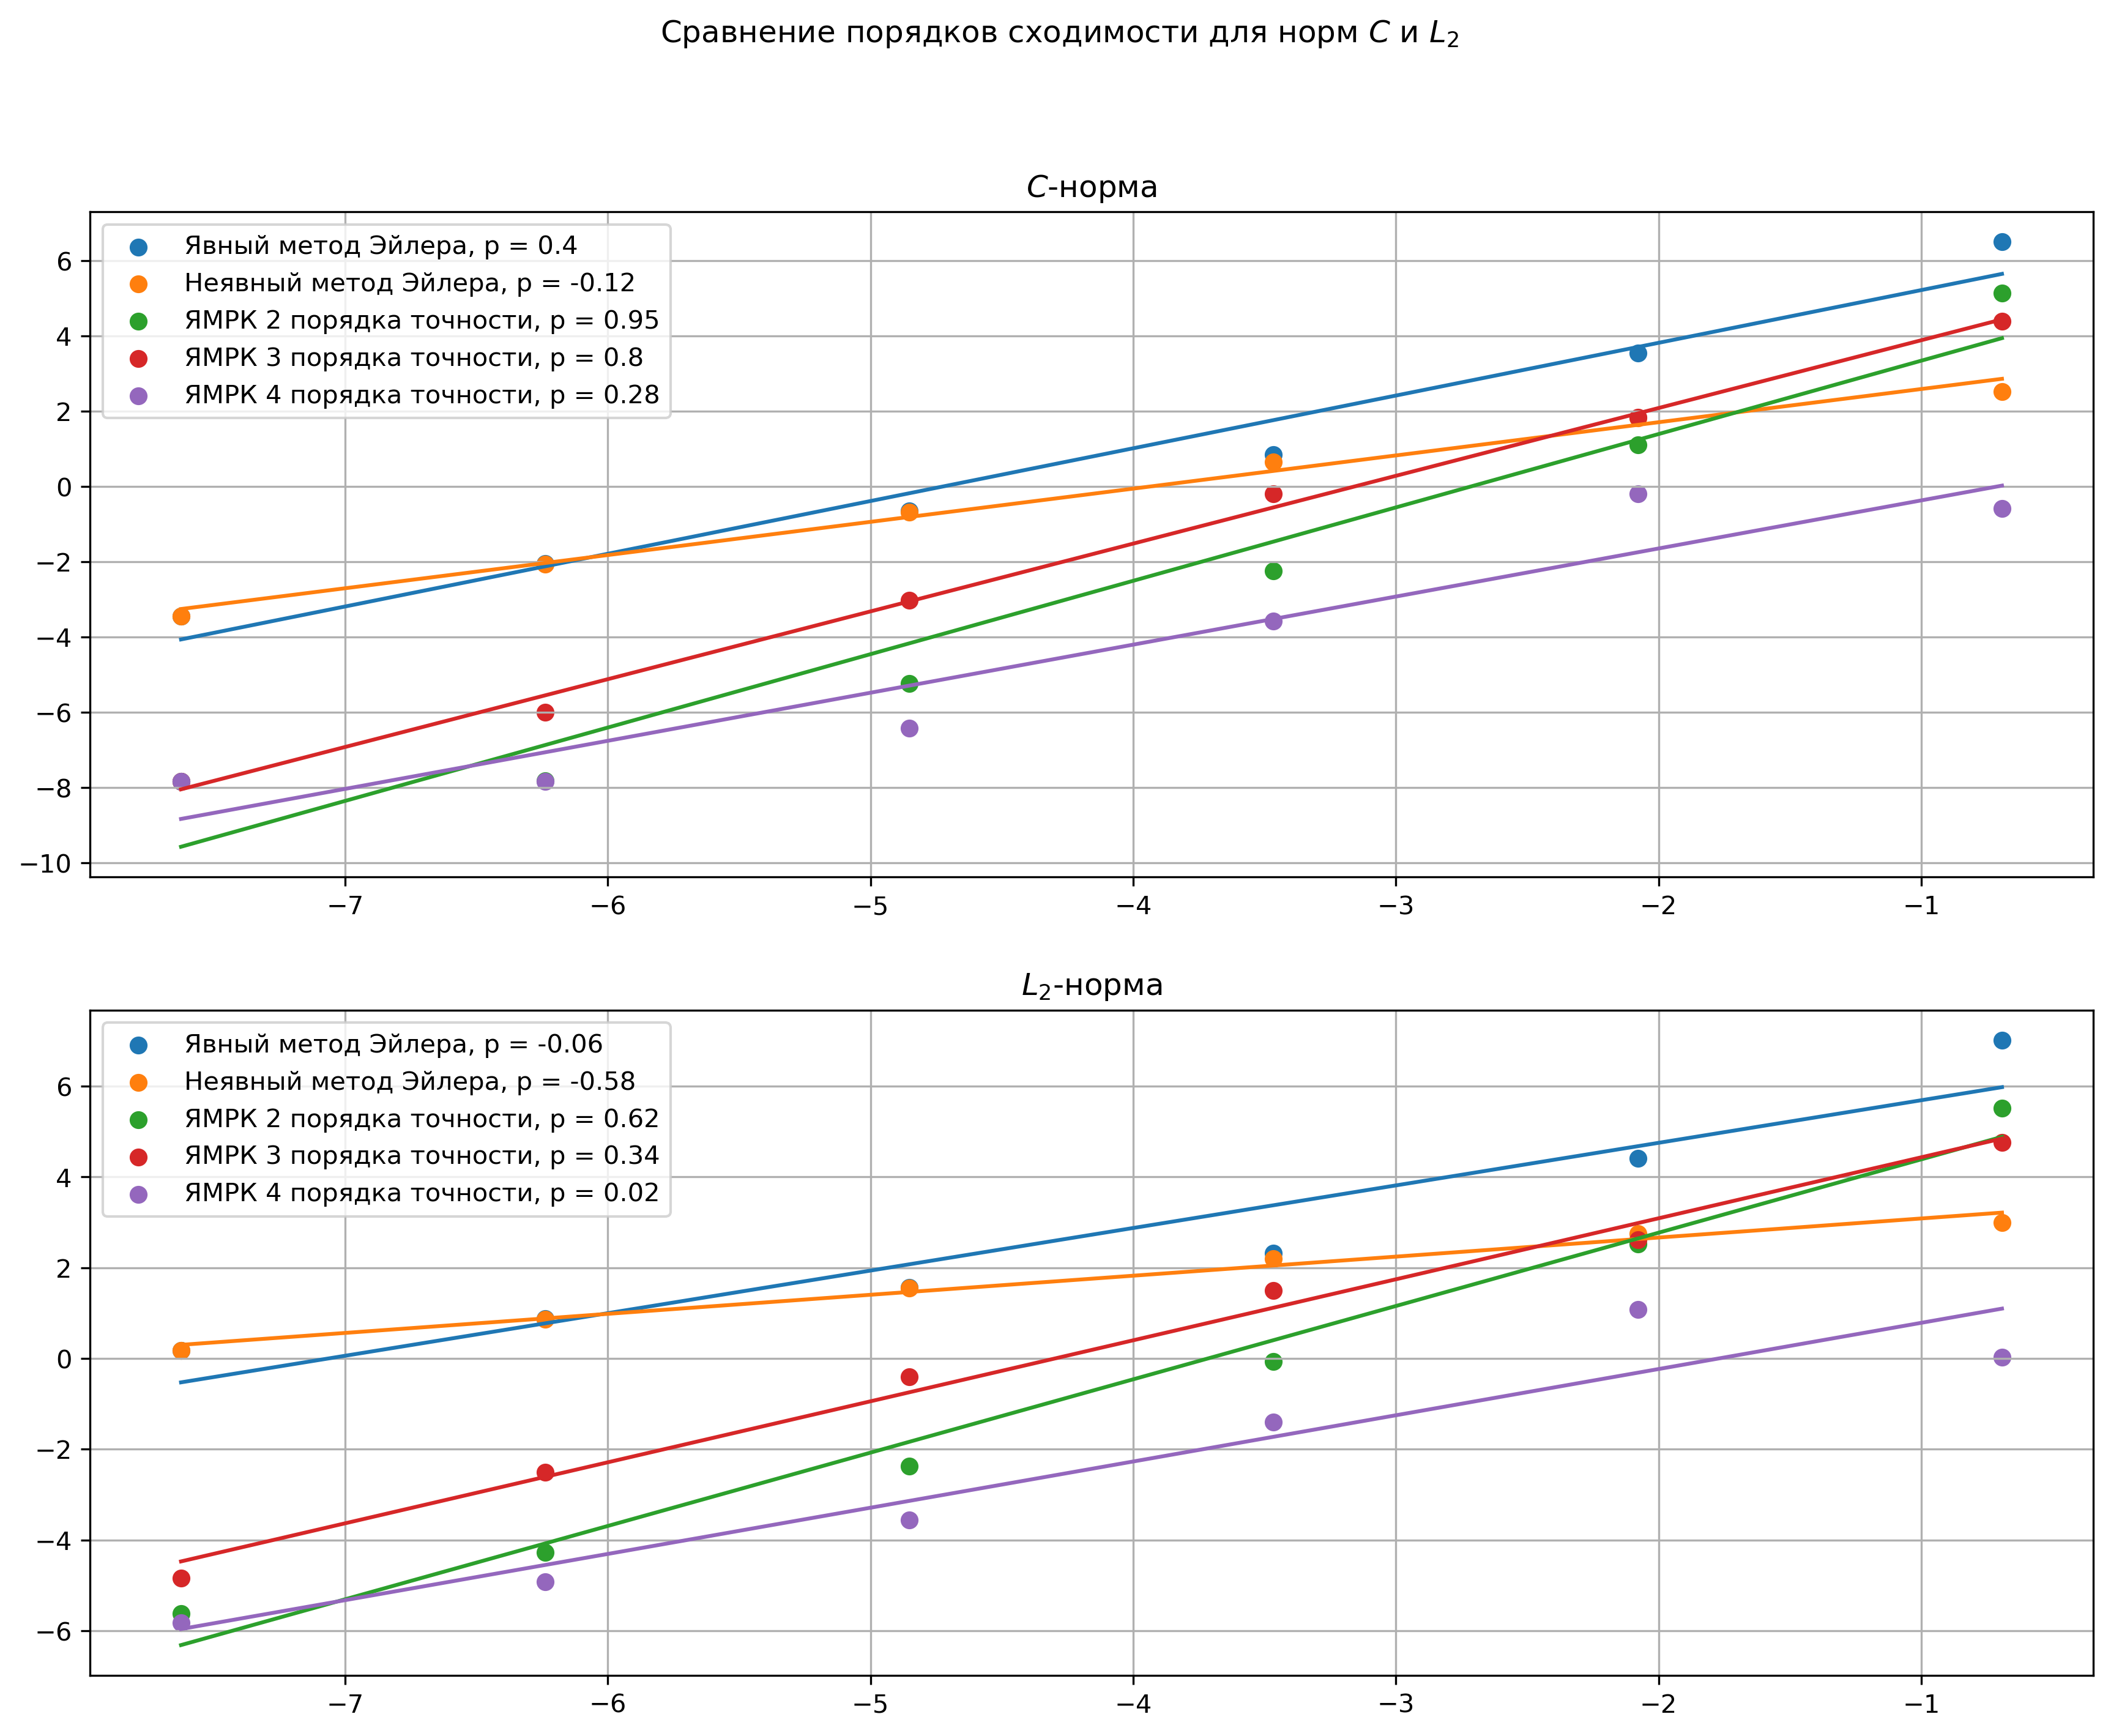

In [118]:
fig, (axC, axL2) = plt.subplots(2)
fig.set_size_inches(6.4 * 2.2, 4.8 * 2.2)
fig.set_dpi(300)
fig.suptitle(r'Сравнение порядков сходимости для норм $C$ и $L_2$')
for column in C_norm.columns:
    params, _ = curve_fit(
        linear_func,
        np.log(C_norm.index),
        C_norm[column]
    )
    axC.scatter(np.log(C_norm.index), C_norm[column], label=column + ', p = {}'.format(round(params[0] - 1, 2)))
    axC.plot(np.log(C_norm.index), linear_func(np.log(C_norm.index), *params))
for column in L2_norm.columns:
    params, _ = curve_fit(
        linear_func,
        np.log(L2_norm.index),
        L2_norm[column]
    )
    axL2.scatter(np.log(L2_norm.index), L2_norm[column], label=column + ', p = {}'.format(round(params[0] - 1, 2)))
    axL2.plot(np.log(L2_norm.index), linear_func(np.log(L2_norm.index), *params))
axC.set_title(r'$C$-норма')
axL2.set_title(r'$L_2$-норма')
axC.grid()
axL2.grid()
axC.legend(loc='upper left')
axL2.legend(loc='upper left')

Видим, что порядки апостериорной сходимости слабо коррелируют с порядками аппроксимации методов. Это может быть связано с неудачно выбранным начальным условием (для всех методов $|p| < 1$).

# Задача 2

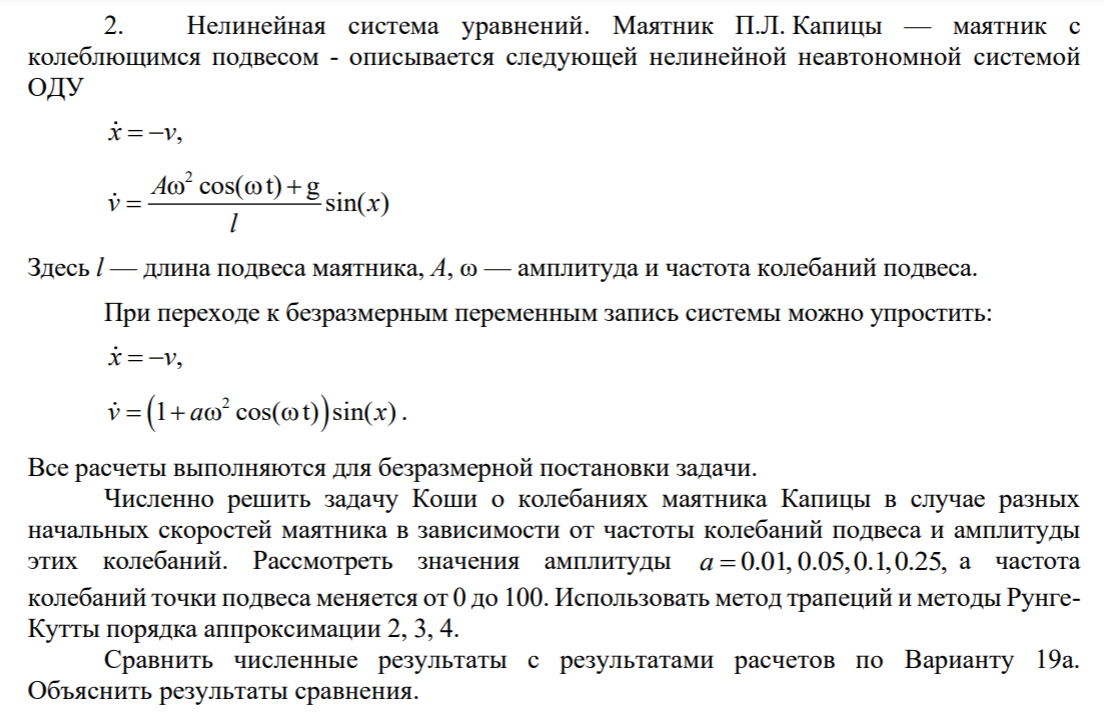

Условие задачи можно переписать в следующем виде:

$$
\begin{array}{l}
\left(\begin{array}{c}
\dot v(t) \\
\dot x(t)
\end{array}\right)=A(t, x) \cdot 
\left(\begin{array}{c}
v(t) \\
x(t)
\end{array}\right), \\
A(t, x)=\left(\begin{array}{cc}
0 & \alpha(t, x) \\
-1 & 0
\end{array}\right), \\
\alpha(t, x)=\frac{\sin(x)}{x} \cdot\left(1+a\omega^{2} \cos \omega t\right) \equiv \\
\equiv sinc(x) \cdot\left(1+a\omega^{2} \cos \omega t\right), \\
\left(\begin{array}{c}
v(0) \\
x(0)
\end{array}\right) = 
\left(\begin{array}{c}
v(0) \\
0
\end{array}\right)
\end{array}
$$

Или

$$
\begin{array}{l}
\dot{u}=A(t, x) \cdot u, \\
A(t, x)=\left(\begin{array}{cc}
0 & \alpha(t, x) \\
-1 & 0
\end{array}\right), \\
\alpha(t, x)=sinc(x) \cdot\left(1+a\omega^{2} \cos \omega t\right), \\
u(t)=\left(\begin{array}{c}
v(t) \\
x(t)
\end{array}\right), \\
u(0) = \left(\begin{array}{c}
v(0) \\
0
\end{array}\right)
\end{array}
$$

Нужно решить эту систему следующими методами:
* Метод трапеций
* ЯМРК 2, 3 и 4 порядков точности,

а также исследовать зависимость решения от начальной скорости $v(0)$, параметра частоты $w \in [0, 100]$ и безрамерной амплитуды $a \in \{0.01, 0.05,0.1,0.25\}$.

## Методы

In [23]:
def alfa(t, x, w, a):
    return np.sinc(x) * (1 + a * w**2 * np.cos(w * t))

In [122]:
def A_2(t, x, w, a):
    return np.array([[0, alfa(t, x, w, a)], [-1, 0]])

### Метод трапеций
Общий вид метода:

$$
\frac{u^{n+1} - u^{n}}{\tau}=\frac{f^{n} + f^{n+1}}{2},
$$

где $f^n \equiv f(t_n, u^n)$, $f^{n+1} \equiv f(t_{n+1}, u^{n+1})$, $t_n \equiv t_0 + n\tau$, $u^n \equiv u(t_n)$, $u^0 = u(0)$. Таким образом этот метод получается, если взять среднее арифметическое правых частей явного и неявного методов Эйлера.

Перепишем это уравнение относительно $u^{n+1}$:

$$
u^{n+1}=u^{n}+\frac{\tau}{2} \left[f(t_{n+1}, u^{n+1}) +f(t_n, u^n)\right]
$$

Рассмотрим отображение

$$
R(w) \equiv w-u^{n}-\frac{\tau}{2} \left[f\left(t^{n+1}, w\right)+f\left(t^{n}, u^{n}\right)\right]
$$

Тогда $u^{n+1}$ можно вычислить, решив систему нелинейных уравнений 

$$
R(u^{n+1}) = 0
$$

В нашем случае $R(w)$ можно переписать как

$$
R(w) \equiv w-u^{n}-\frac{\tau}{2} \left[A\left(t_{n+1}, w_2\right)\cdot w+A\left(t_{n}, x^{n}\right)\cdot u^{n}\right],
$$

где $w = (w_1, w_2)^T$.

Таким образом на каждой итерации метода придется решать нелинейное уравнение $R(u^{n+1}) = 0$ для поиска $u^{n+1}$. Это происходит потому, что система уравнений нелинейная, а метод включает в себя неявную часть (нельзя явно выразить $u^{n+1}$ через $t_n$, $t_{n+1}$ и $u^n$).

Для решения нелинейной системы воспользуемся функцией `scipy.optimize.fsolve` библиотеки `scipy`. 

In [155]:
def R(A, w, a, t_old, t_new, tau, u_old, u_new):
    return (
        u_new - u_old - tau / 2 * 
        (
            A(t_new, u_new[1], w, a) @ u_new + 
            A(t_old, u_old[1], w, a) @ u_old
        )
    )

In [156]:
class NonlinearSystem:
    def __init__(self, A, w, a, t_old, t_new, tau, u_old):
        self.A = A
        self.w = w
        self.a = a
        self.t_old = t_old
        self.t_new = t_new
        self.tau = tau
        self.u_old = u_old
    
    
    def system_with_params(self, u_new):
        return R(self.A, self.w, self.a, self.t_old, self.t_new, self.tau, self.u_old, u_new)

In [157]:
from scipy.optimize import fsolve

In [158]:
def trapeze_nonlinear(A, t_0, t_max, tau, u_0, w, a):
    N = int((t_max - t_0) / tau)  # число шагов
    t = [t_0 + n * tau for n in range(N + 1)]  # сетка
    u = np.array([[0.] * len(u_0) for _ in range(N + 1)])  # вектор u(t) в узлах сетки
    u[0] = u_0  # начальное приближение
    for n in range(N):
        system = NonlinearSystem(A, w, a, t[n], t[n + 1], tau, u[n])
        u[n + 1] = fsolve(system.system_with_params, u[n])
    return t, u[:, 0], u[:, 1] 

### Методы Рунге-Кутты

Для ЯМРК такой сложности возникать не будет, так как эти методы явные, и $u^{n+1}$ можно выразить через значения $t_n$ и $u^n$.

In [545]:
def runge_kutta_nonlinear(a_matrix, b, c, A, t_0, t_max, tau, u_0, w, a):
    """
    Явные методы Рунге-Кутты для многомерных дифференциальных уравнений.
    
    Параметры:
    a_matrix - матрица размера sxs
    b, c - векторы размера sx1
    A - матрица A(t), на которую умножается вектор u(t)
    t_0 - левая граница отрезка, на котором решается задача Коши
    t_max - правая граница отрезка, на котором решается задача Коши
    tau - величина шага на итерации
    u_0 - вектор начальных условий (dot(x)(p), x(p)) (в этом случае реализовано как значение u(t_0))
    
    Возвращает значения t, dot(x)(t), x(t) на сетке.
    """
    dim = len(u_0)  # размерность системы
    N = int((t_max - t_0) / tau)  # число шагов
    t = [t_0 + n * tau for n in range(N + 1)]  # сетка
    u = np.array([[0.] * dim for _ in range(N + 1)])  # вектор u(t) в узлах сетки
    u[0] = u_0  # начальное приближение
    s = len(b)  # число стадий
    for n in range(N):
        k = np.array([[0.] * dim for _ in range(s)])
        for i in range(s):
            k[i] = A(t[n] + c[i] * tau, (u[n] + tau * a_matrix[i] @ k)[1], w, a) @ (u[n] + tau * a_matrix[i] @ k)
        u[n + 1] = u[n] + tau * b @ k
    return t, u[:, 0], u[:, 1]

## Вычисление решения при помощи описанных методов

Рассмотрим системы для ситуаций, когда маятник изначально находился в положении равновесия, т.е. 

$$x(0) = 0$$

Для скорости и частоты выберем промежутки $[1, 100]$ с шагом в 25 единиц.

В безразмерном варианте мы положили собственную частоту колебаний маятника $\omega_0 = \sqrt{\frac{g}{l}} = 1$. Поэтому при $\omega = 1$ мы будем наблюдать резонанс. 

Одно полное колебание маятник совершает за 

$$T =\frac{2\pi}{\omega}$$

Это значение будем использовать в качестве правой границы отрезка времени для моделирования.

In [548]:
amplitude = [0.01, 0.05, 0.1, 0.25]
color = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
frequency = [1] + list(range(25, 101, 25))
speed = [1] + list(range(25, 101, 25))
tau = 1e-3  # фиксируем величину шага, при которой сходимость будет хорошей

In [341]:
def u0(v0):
    return np.array([v0, 0])

In [342]:
from itertools import product

In [546]:
def plot_phase_diagrams(amps, clrs, freqs, speeds):
    s, f = len(speeds), len(freqs)
    fig, axes = plt.subplots(s, f)
    fig.set_size_inches(6.4 * 2.2, 4.8 * 2.2)
    fig.set_dpi(300)
    fig.suptitle(r'Фазовые траектории в зависимости от $\omega$, $a$ и $v_0$')
    fig.tight_layout(pad=3.0)
    i = 0
    for w, v0 in product(freqs, speeds):
        for a, c in zip(amps, clrs):
            t, v, x = trapeze_nonlinear(A_2, 0, 2*np.pi/w, tau, u0(v0), w, a)
            axes[i // f, i % f].plot(-x, v, c, alpha=0.3, label='a = {}'.format(a))
            for order in [_2_order, _3_order, _4_order]:
                t, v, x = runge_kutta_nonlinear(*order, A_2, 0, 2*np.pi/w, tau, u0(v0), w, a)
                axes[i // f, i % f].plot(-x, v, c, alpha=0.3)
            axes[i // f, i % f].set_title(r'$\omega$ = {}, $v_0$ = {}'.format(w, v0))
            axes[i // f, i % f].grid()
            axes[i // f, i % f].legend(loc='lower right', prop={'size': 5})
            axes[i // f, i % f].ticklabel_format(useOffset=False)
        i += 1
    for i, ax in enumerate(axes):
        if i == len(axes) - 1:
            ax[0].set(xlabel=r'$-x(t)$', ylabel=r'$v(t)$')
            ax[1].set(xlabel=r'$-x(t)$')
        else:
            ax[0].set(ylabel=r'$v(t)$')
#     for ax in axes.flat:
#         ax.label_outer()

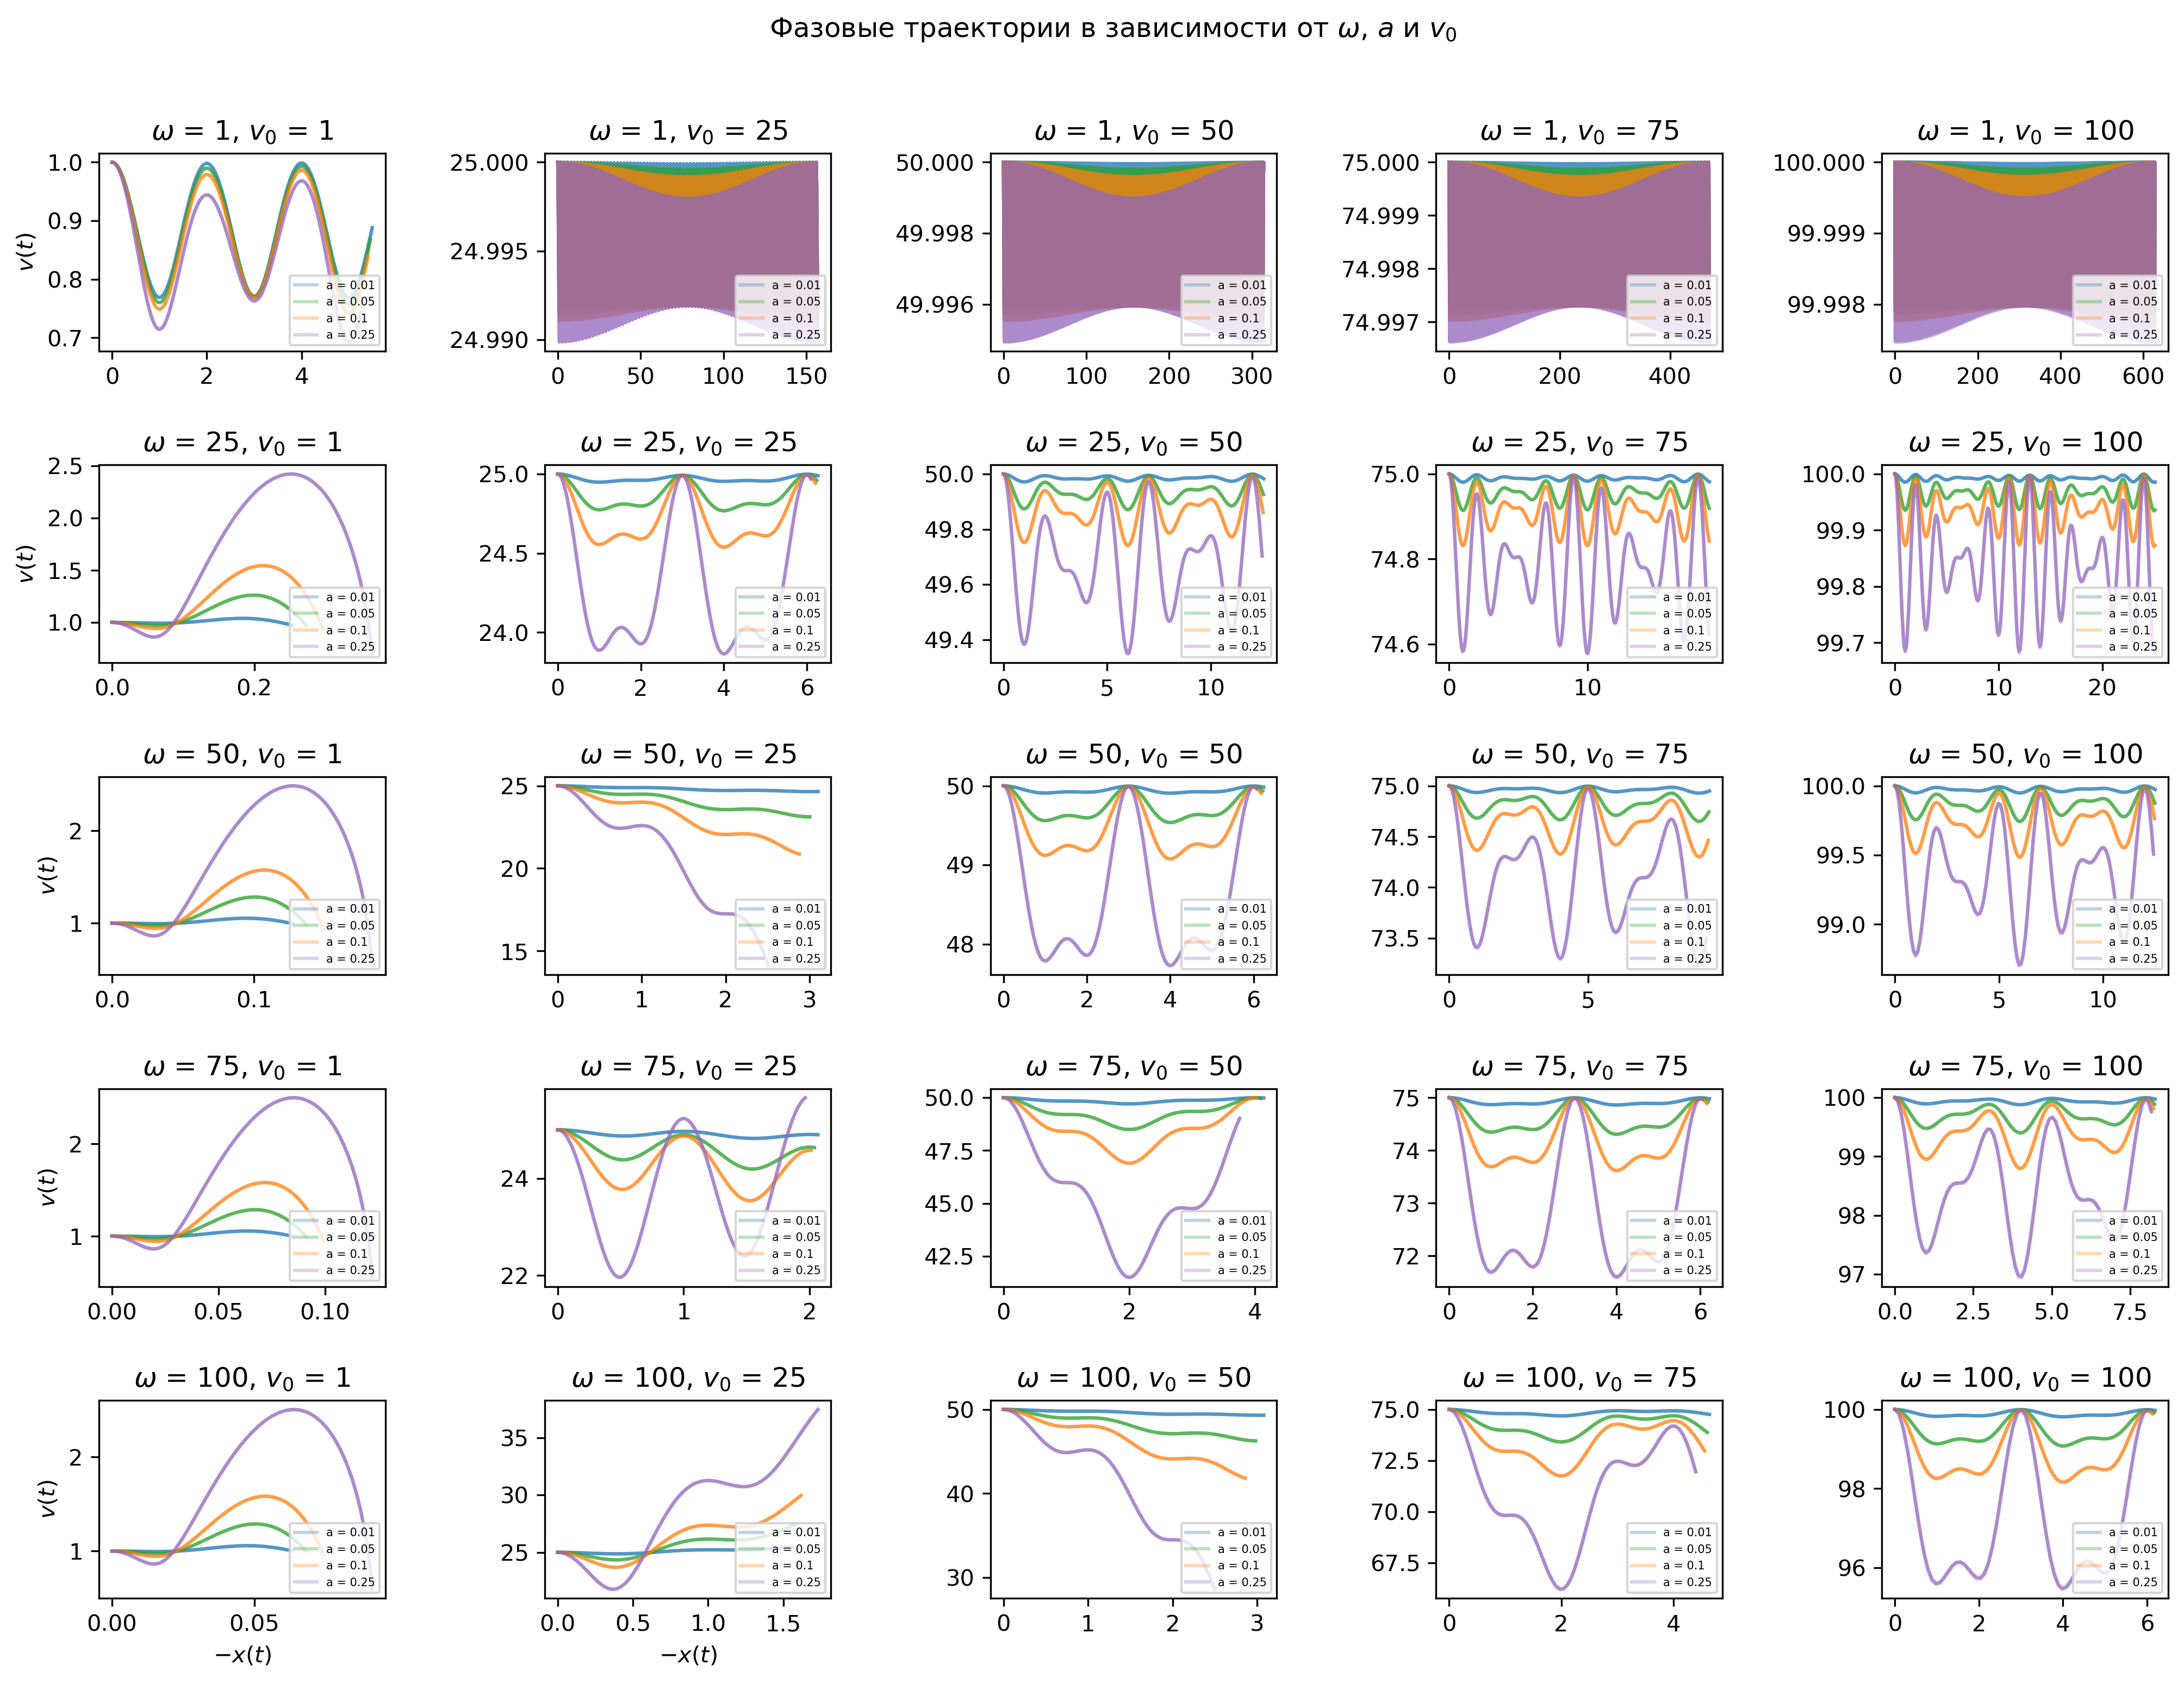

In [549]:
plot_phase_diagrams(amplitude, color, frequency, speed)

При $\omega = 1$ и $v > 1$ мы действительно наблюдаем резонанс. При увеличении частоты видим, что период картины уменьшается. При малой скорости колебания возникают слабо. При увеличении начальной скорости $v_0$ начинают возникать колебания (и где-то даже биения). С ростом амплитуды минимумы на фазовом потрете становятся глубже.

Также видно, что рисунки на диагоналях схожи по структуре.

# Задача 3

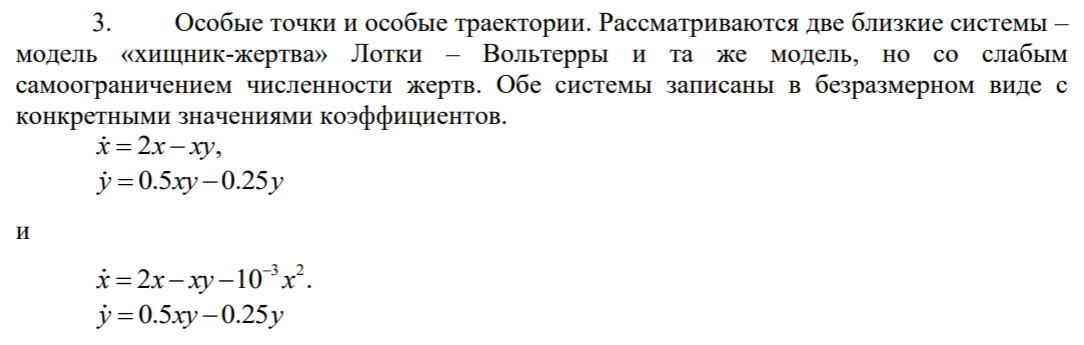 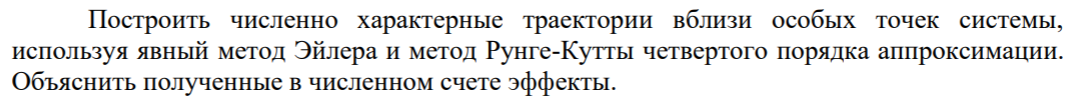

Уравнения из условия можно переписать в виде

$$
\begin{array}{l}
\left(\begin{array}{l}
\dot{x} \\
\dot{y}
\end{array}\right)=\left(\begin{array}{cc}
2 & -x \\
0.5 y & -0.25
\end{array}\right)\left(\begin{array}{l}
x \\
y
\end{array}\right) \\
\left(\begin{array}{l}
\dot{x} \\
\dot{y}
\end{array}\right) =\left(\begin{array}{cc}
2-10^{-3} x & -x \\
0.5 y & -0.25
\end{array}\right)\left(\begin{array}{l}
x \\
y
\end{array}\right)
\end{array}
$$

Или эквивалентно

$$
\begin{array}{l}
\dot{u}=A(u) \cdot u, \\
A(u)=\left(\begin{array}{cc}
2 & -x \\
0.5 y & -0.25
\end{array}\right) \\
\dot{u}=A^{*}(u) \cdot u, \\
A^{*}(u)= \left(\begin{array}{cc}
2-10^{-3} x & -x \\
0.5 y & -0.25
\end{array}\right) \\
u(t)=\left(\begin{array}{l}
x(t) \\
y(t)
\end{array}\right)
\end{array}
$$

Найдем особые точки системы из условия $\det{A} = 0$

Решения для системы без квадратичной по $x$ поправки:

$$
\left(\begin{array}{l}
x \\
y
\end{array}\right) = \left(\begin{array}{l}
0 \\
0
\end{array}\right) \lor
\left(\begin{array}{l}
x \\
y
\end{array}\right) = \left(\begin{array}{c}
0.5 \\
2
\end{array}\right)
$$

Решения для системы с поправкой:

$$
\left(\begin{array}{l}
x \\
y
\end{array}\right) = \left(\begin{array}{l}
0 \\
0
\end{array}\right) \lor
\left(\begin{array}{l}
x \\
y
\end{array}\right) = \left(\begin{array}{c}
0.5 \\
1.9995
\end{array}\right) \lor
\left(\begin{array}{l}
x \\
y
\end{array}\right) = \left(\begin{array}{c}
2000 \\
0
\end{array}\right)
$$

Якобианы моделей будут равны

$$
\begin{array}{l}
J(x, y) = \left(\begin{array}{cc}
2 - y & -x \\
0.5 y & 0.5x-0.25
\end{array}\right) \\
J^*(x, y) = \left(\begin{array}{cc}
2 - y - 2\cdot 10^{-3} x & -x \\
0.5 y & 0.5x-0.25
\end{array}\right)
\end{array}
$$

В точке $(0, 0)$ 

$$
J(0, 0) = J^*(0, 0) = \left(\begin{array}{cc}
2 & 0 \\
0 & -0.25
\end{array}\right)
$$

Собственные числа равны соответственно $\lambda_1 = 2$ и $\lambda_2 = -0.25$, $\lambda_1 \cdot \lambda_2 < 0$, значит это особая точка типа **"седло"**.

В точках $(0.5, 2)$ и $(0.5, 1.9995)$

$$
\begin{array}{l}
J(0.5, 2) = \left(\begin{array}{cc}
0 & -0.5 \\
1 & 0
\end{array}\right) \\
J^*(0.5, 1.9995) = \left(\begin{array}{cc}
0 & -0.5 \\
0.99975 & 0
\end{array}\right)
\end{array}
$$

Соответственно собственные числа равны 

$$\lambda_{1,2}=\pm \frac{i}{\sqrt{2}}, \space \lambda_{1,2}^*\approx\pm \frac{i}{\sqrt{2}}$$

Последнее примерное равенство написано с точностью до четвертого знака после запятой. Получается, что эти точки являются особыми точками типа **"центр"** для соответствующих систем.

Наконец в точке $(2000, 0)$ матрица и якобиан второй системы равны

$$
\begin{array}{l}
A^*(2000, 0) = \left(\begin{array}{cc}
0 & -2000 \\
0 & -0.25
\end{array}\right) \\
J^*(2000, 0) = \left(\begin{array}{cc}
-2 & -2000 \\
0 & 999.75
\end{array}\right)
\end{array}
$$

Видно, что $\det{A} = 0$ и $\exists \lambda_{1,2} \neq 0$. Значит, фазовая картина возле этой точки будет выглядеть как **множество параллельных прямых**.

Нужно построить фазовые траектории вблизи особых точек, используя методы:
* Явный метод Эйлера
* ЯМРК 4 порядка аппроксимации

In [381]:
def A_3(u):
    return np.array([[2, -u[0]], [0.5 * u[1], -0.25]])

In [382]:
def A_3_star(u):
    return np.array([[2 - 1e-3 * u[0], -u[0]], [0.5 * u[1], -0.25]])

## Методы

### Явный метод Эйлера

In [387]:
def explicit_euler_nonlinear(A, N, tau, u_0):
    """
    Явный метод Эйлера для многомерных дифференциальных уравнений.
    
    Параметры:
    A - матрица A(u), на которую умножается вектор u(t)
    N - число шагов
    tau - величина шага на итерации
    u_0 - вектор начальных условий (x(p), y(p))
    
    Возвращает значения x(t) и y(t) в узлах сетки.
    """
    u = np.array([[0.] * len(u_0) for _ in range(N + 1)])  # вектор u(t) в узлах сетки
    u[0] = u_0  # начальное приближение
    for n in range(N):
        u[n + 1] = (np.eye(len(u_0)) + tau * A(u[n])) @ u[n]
    return u[:, 0], u[:, 1]

### Метод Рунге-Кутты 4 порядка аппроксимации

In [541]:
def runge_kutta_nonlinear(a_matrix, b, c, A, N, tau, u_0):
    """
    Явные методы Рунге-Кутты для многомерных дифференциальных уравнений.
    
    Параметры:
    a_matrix - матрица размера sxs
    b, c - векторы размера sx1
    A - матрица A(u), на которую умножается вектор u(t)
    N - число итераций
    tau - величина шага на итерации
    u_0 - вектор начальных условий (x(p), y(p))
    
    Возвращает значения x(t), y(t) на сетке.
    """
    dim = len(u_0)  # размерность системы
    u = np.array([[0.] * dim for _ in range(N + 1)])  # вектор u(t) в узлах сетки
    u[0] = u_0  # начальное приближение
    s = len(b)  # число стадий
    for n in range(N):
        k = np.array([[0.] * dim for _ in range(s)])
        for i in range(s):
            k[i] = A(u[n] + tau * a_matrix[i] @ k) @ (u[n] + tau * a_matrix[i] @ k)
        u[n + 1] = u[n] + tau * b @ k
    return u[:, 0], u[:, 1]

In [474]:
def initial_point_with_deviation(x0, y0):
    return np.array([x0 + np.random.normal(scale=0.25), y0 + np.random.normal(scale=0.25)])

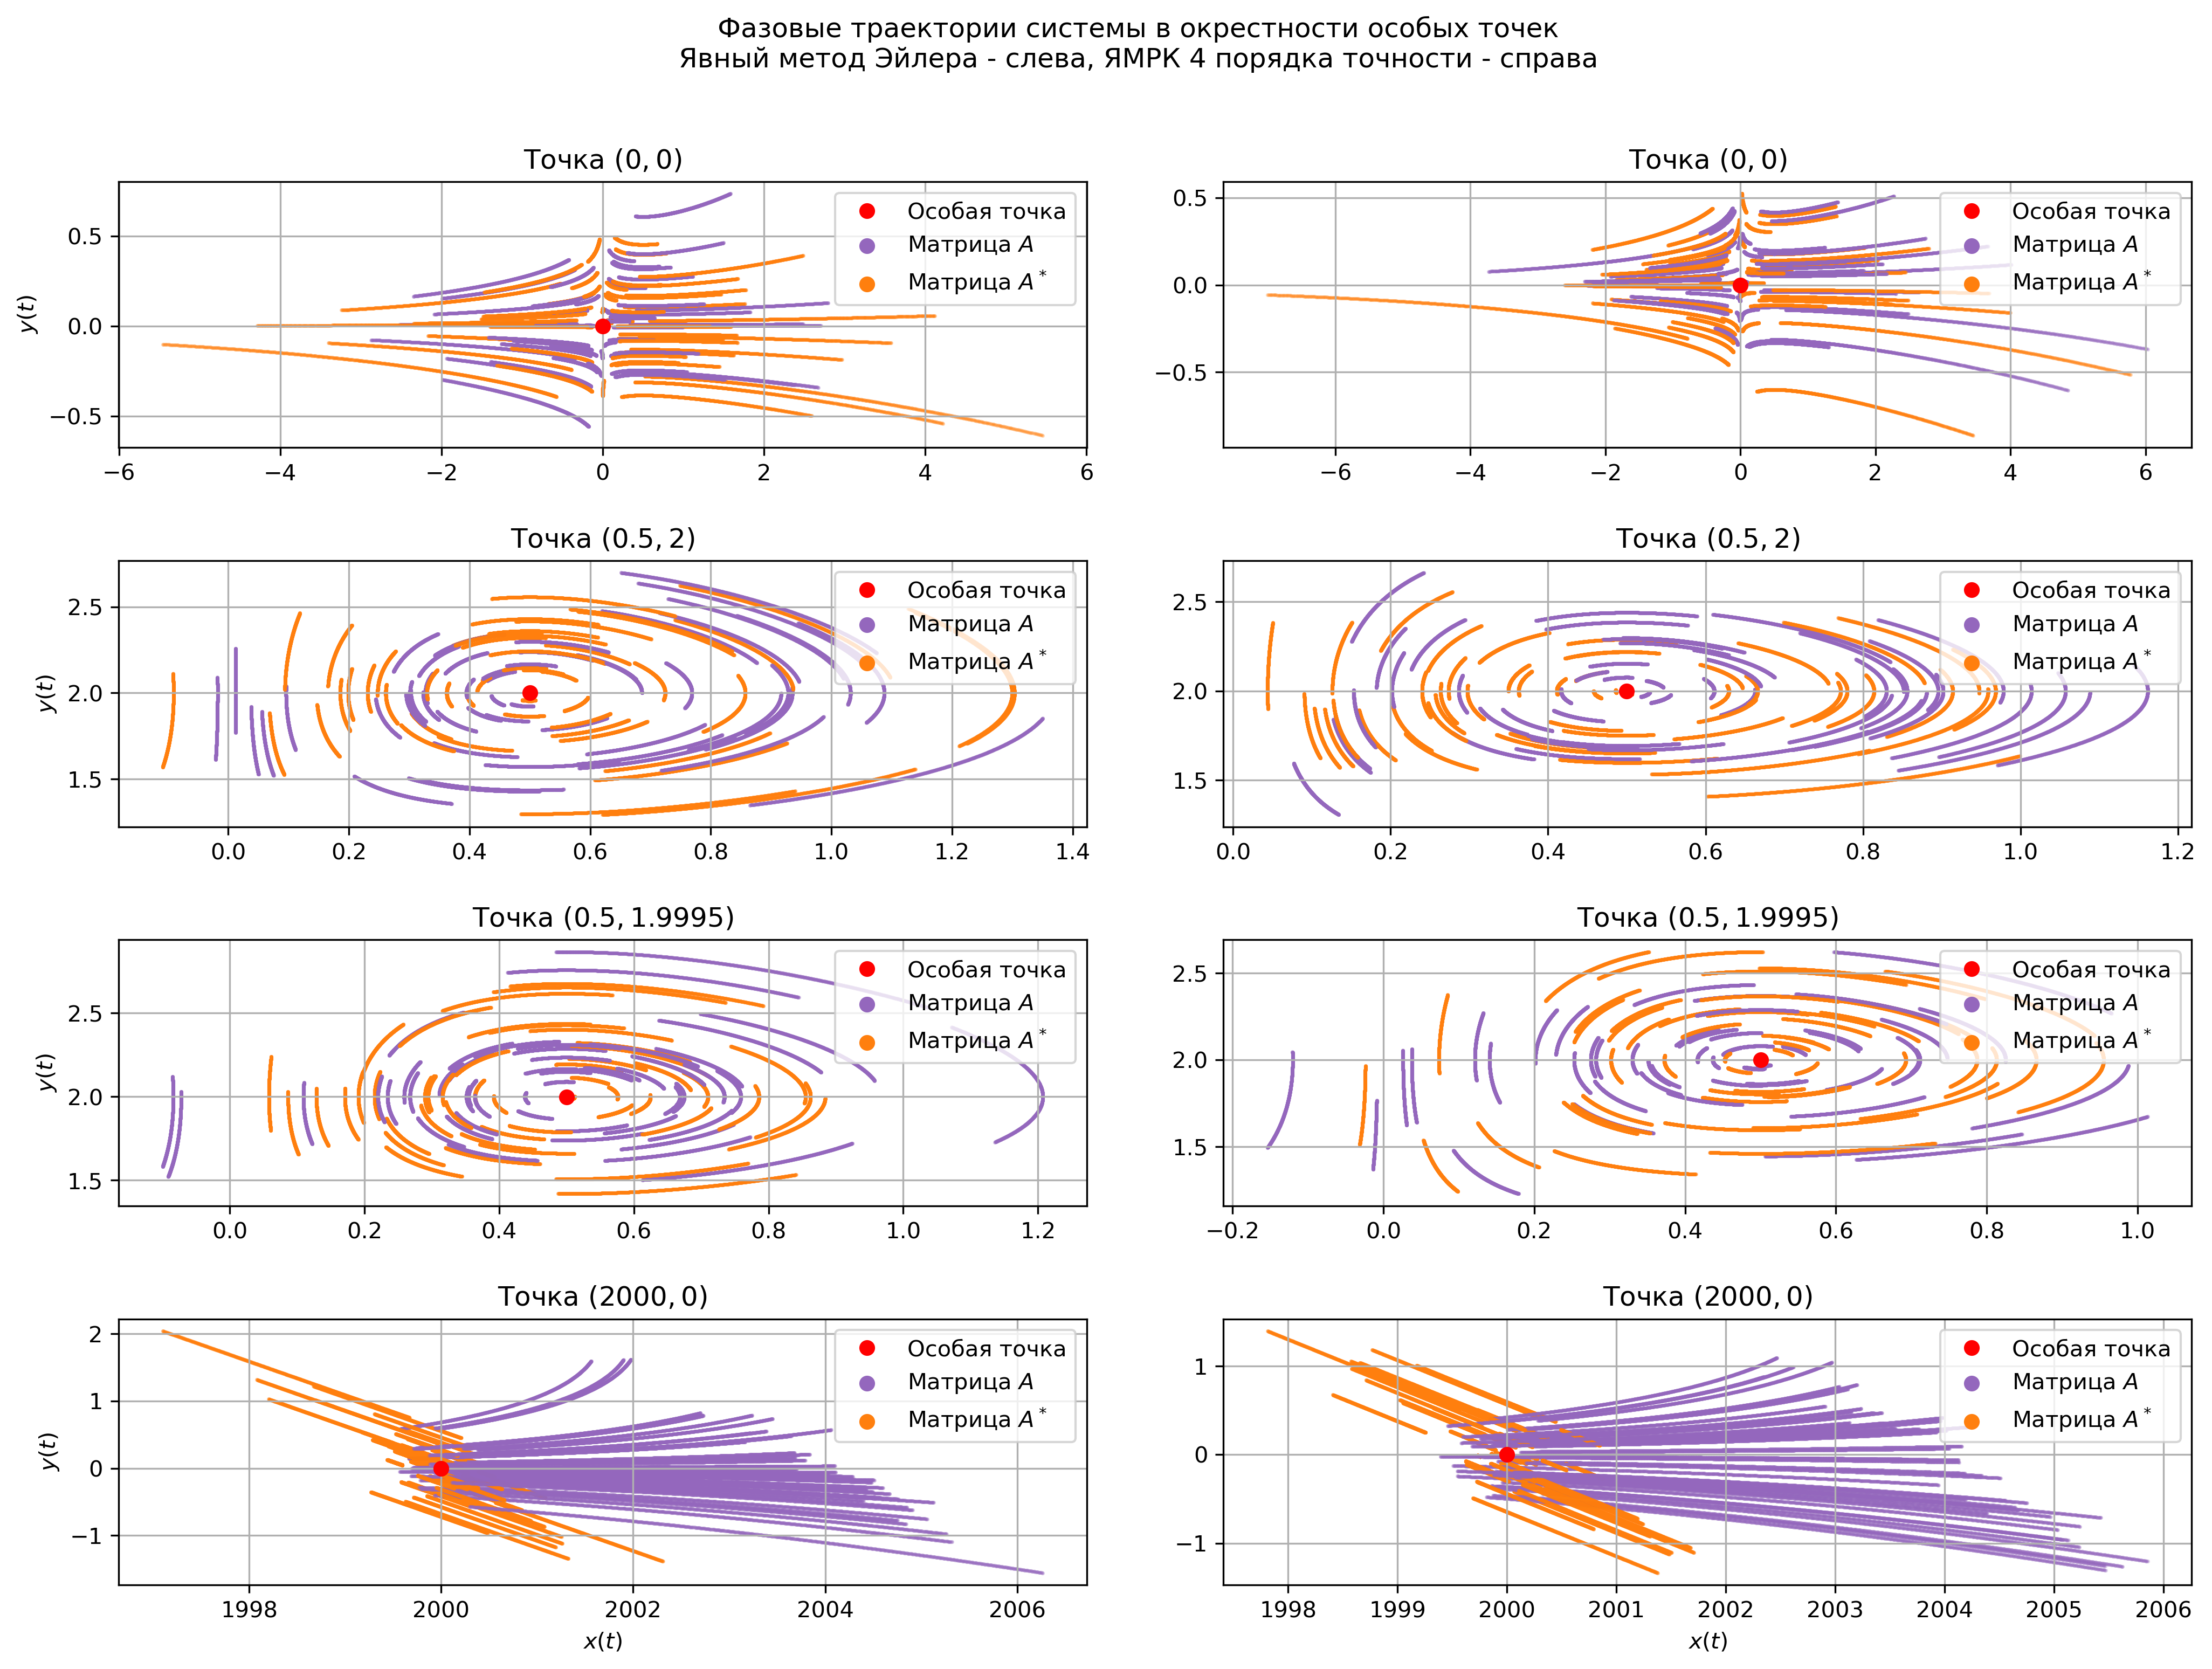

In [543]:
fig, axes = plt.subplots(4, 2)
fig.set_size_inches(6.4 * 2.2, 4.8 * 2.2)
fig.set_dpi(300)
fig.suptitle('Фазовые траектории системы в окрестности особых точек\nЯвный метод Эйлера - слева, ЯМРК 4 порядка точности - справа')
fig.tight_layout(pad=3.0)
for i, (x0, y0) in enumerate([(0, 0), (0.5, 2), (0.5, 1.9995), (2000, 0)]):
    for _ in range(50):
        if (x0, y0) == (2000, 0):
            x, y = explicit_euler_nonlinear(A_3, 1000, 0.000001, initial_point_with_deviation(x0, y0))
            axes[i, 0].scatter(x, y, c='tab:purple', s=0.5, alpha=0.3)
            x, y = explicit_euler_nonlinear(A_3_star, 1000, 0.000001, initial_point_with_deviation(x0, y0))
            axes[i, 0].scatter(x, y, c='tab:orange', s=0.5, alpha=0.3)
        else:
            x, y = explicit_euler_nonlinear(A_3, 1000, 0.001, initial_point_with_deviation(x0, y0))
            axes[i, 0].scatter(x, y, c='tab:purple', s=0.5, alpha=0.3)
            x, y = explicit_euler_nonlinear(A_3_star, 1000, 0.001, initial_point_with_deviation(x0, y0))
            axes[i, 0].scatter(x, y, c='tab:orange', s=0.5, alpha=0.3)
        
        if (x0, y0) == (2000, 0):
            x, y = runge_kutta_nonlinear(*_4_order, A_3, 1000, 0.000001, initial_point_with_deviation(x0, y0))
            axes[i, 1].scatter(x, y, c='tab:purple', s=0.5, alpha=0.3)
            x, y = runge_kutta_nonlinear(*_4_order, A_3_star, 1000, 0.000001, initial_point_with_deviation(x0, y0))
            axes[i, 1].scatter(x, y, c='tab:orange', s=0.5, alpha=0.3)
        else:
            x, y = runge_kutta_nonlinear(*_4_order, A_3, 1000, 0.001, initial_point_with_deviation(x0, y0))
            axes[i, 1].scatter(x, y, c='tab:purple', s=0.5, alpha=0.3)
            x, y = runge_kutta_nonlinear(*_4_order, A_3_star, 1000, 0.001, initial_point_with_deviation(x0, y0))
            axes[i, 1].scatter(x, y, c='tab:orange', s=0.5, alpha=0.3)
    
    for j in range(2):
        axes[i, j].plot(x0, y0, 'ro', label='Особая точка')
        axes[i, j].scatter([], [], c='tab:purple', label='Матрица $A$')
        axes[i, j].scatter([], [], c='tab:orange', label='Матрица $A^*$')
        axes[i, j].set_title(r'Точка $({}, {})$'.format(x0, y0))
        axes[i, j].grid()
        axes[i, j].legend(loc='upper right')

for i, ax in enumerate(axes):
    if i == len(axes) - 1:
        ax[0].set(xlabel=r'$x(t)$', ylabel=r'$y(t)$')
        ax[1].set(xlabel=r'$x(t)$')
    else:
        ax[0].set(ylabel=r'$y(t)$')
# for ax in axes.flat:
#     ax.label_outer()

Как видно, оба метода успешно нашли решения в окрестностях особых точек. Виды фазовых портретов согласуются с теорией.